In [1]:
# Mnist
# DataLoader,Transformation
# MultiLayerNeuralNet ,activation function
# Loss and optimizer
# Training loop
# Model evaluation
# Gpu support

In [3]:
import torch 
import torch.nn as nn
import torch.functional as f
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
# device config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# hyperparameters
input_size=784 # 28*28
hidden_size=128
num_classes=10
num_epochs=5
batch_size=100
learning_rate=0.001

# Mnist Dataset 
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples=iter(train_loader)


Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [12]:
samples,labels=next(examples)
print(samples.shape, labels.shape)
#batchsize 1 channelslike we donnt have color channels 28*28 size 


torch.Size([100, 1, 28, 28]) torch.Size([100])


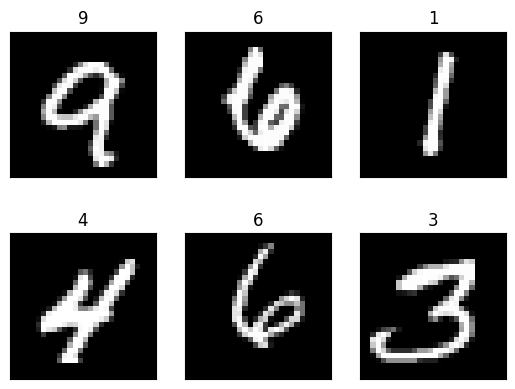

In [13]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.title(labels[i].item())
    plt.xticks([])
    plt.yticks([])

In [24]:
class NeuralNetwork(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super().__init__()
        self.l1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size,num_classes)

    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
model=NeuralNetwork(input_size,hidden_size,num_classes)
model=model.to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)


n_total_Steps=len(train_loader)
# Training loop
for epoch in range(num_epochs):
    for  i ,(images,labels) in enumerate (train_loader): #enumerate i contains index and images and labels are in train_loader
        #100,1,28,28
        # 100,784
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        # forward pass
        outputs=model(images)
        loss=criterion(outputs,labels)
        #backward pass 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100==0:
            print(f'epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_Steps}], Loss: {loss.item():.4f}')
            



epoch [1/5], Step [100/600], Loss: 0.5168
epoch [1/5], Step [200/600], Loss: 0.3797
epoch [1/5], Step [300/600], Loss: 0.3053
epoch [1/5], Step [400/600], Loss: 0.3952
epoch [1/5], Step [500/600], Loss: 0.3131
epoch [1/5], Step [600/600], Loss: 0.3079
epoch [2/5], Step [100/600], Loss: 0.0911
epoch [2/5], Step [200/600], Loss: 0.1409
epoch [2/5], Step [300/600], Loss: 0.1377
epoch [2/5], Step [400/600], Loss: 0.2017
epoch [2/5], Step [500/600], Loss: 0.1546
epoch [2/5], Step [600/600], Loss: 0.1213
epoch [3/5], Step [100/600], Loss: 0.2738
epoch [3/5], Step [200/600], Loss: 0.0785
epoch [3/5], Step [300/600], Loss: 0.0277
epoch [3/5], Step [400/600], Loss: 0.1048
epoch [3/5], Step [500/600], Loss: 0.0664
epoch [3/5], Step [600/600], Loss: 0.1340
epoch [4/5], Step [100/600], Loss: 0.0409
epoch [4/5], Step [200/600], Loss: 0.0958
epoch [4/5], Step [300/600], Loss: 0.1676
epoch [4/5], Step [400/600], Loss: 0.1195
epoch [4/5], Step [500/600], Loss: 0.0772
epoch [4/5], Step [600/600], Loss:

In [40]:
from torchmetrics import Accuracy

# Specify the number of classes in your dataset
num_classes = 10  # Replace this with the actual number of classes in your dataset

# Initialize the metric with the appropriate parameters
accuracy_metric = Accuracy(task="multiclass", num_classes=num_classes).to(device)

# Test
with torch.no_grad():
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        output = model(images)
        # Calculate accuracy
        accuracy_metric.update(output, labels)

# Compute the final accuracy
accuracy = accuracy_metric.compute().item()
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.18%
